# Heart Failure Prediction Model

The dataset above predicts heart failure in a patient with the above health related characteristics.

* The dataset predicts  death event.
* This prediction result is binary.

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels

In [39]:
import pandas as pd #reading datasets
import numpy as np #operations on our dataset
import matplotlib.pyplot as plt #visualization library 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV #Optimizing our model
from sklearn.preprocessing import StandardScaler, LabelEncoder #Preparing our data for modeling
from sklearn.linear_model import LogisticRegressionCV # Linear model for classification
from sklearn.tree import DecisionTreeClassifier #Tree model for classification
from sklearn.svm import SVC # Hyperplane model for classification
from sklearn.ensemble import RandomForestClassifier # Tree boosting model for classification
from sklearn.neural_network import MLPClassifier #Neural network for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve #Metrics used for evaluating model performance
from xgboost import XGBClassifier # Boosting model for classificationfrom statsmodels.stats.outliers_influence import variance_inflation_factor #Handling multicollinearity


In [6]:
#importing the dataset
data=pd.read_csv('heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Visualization

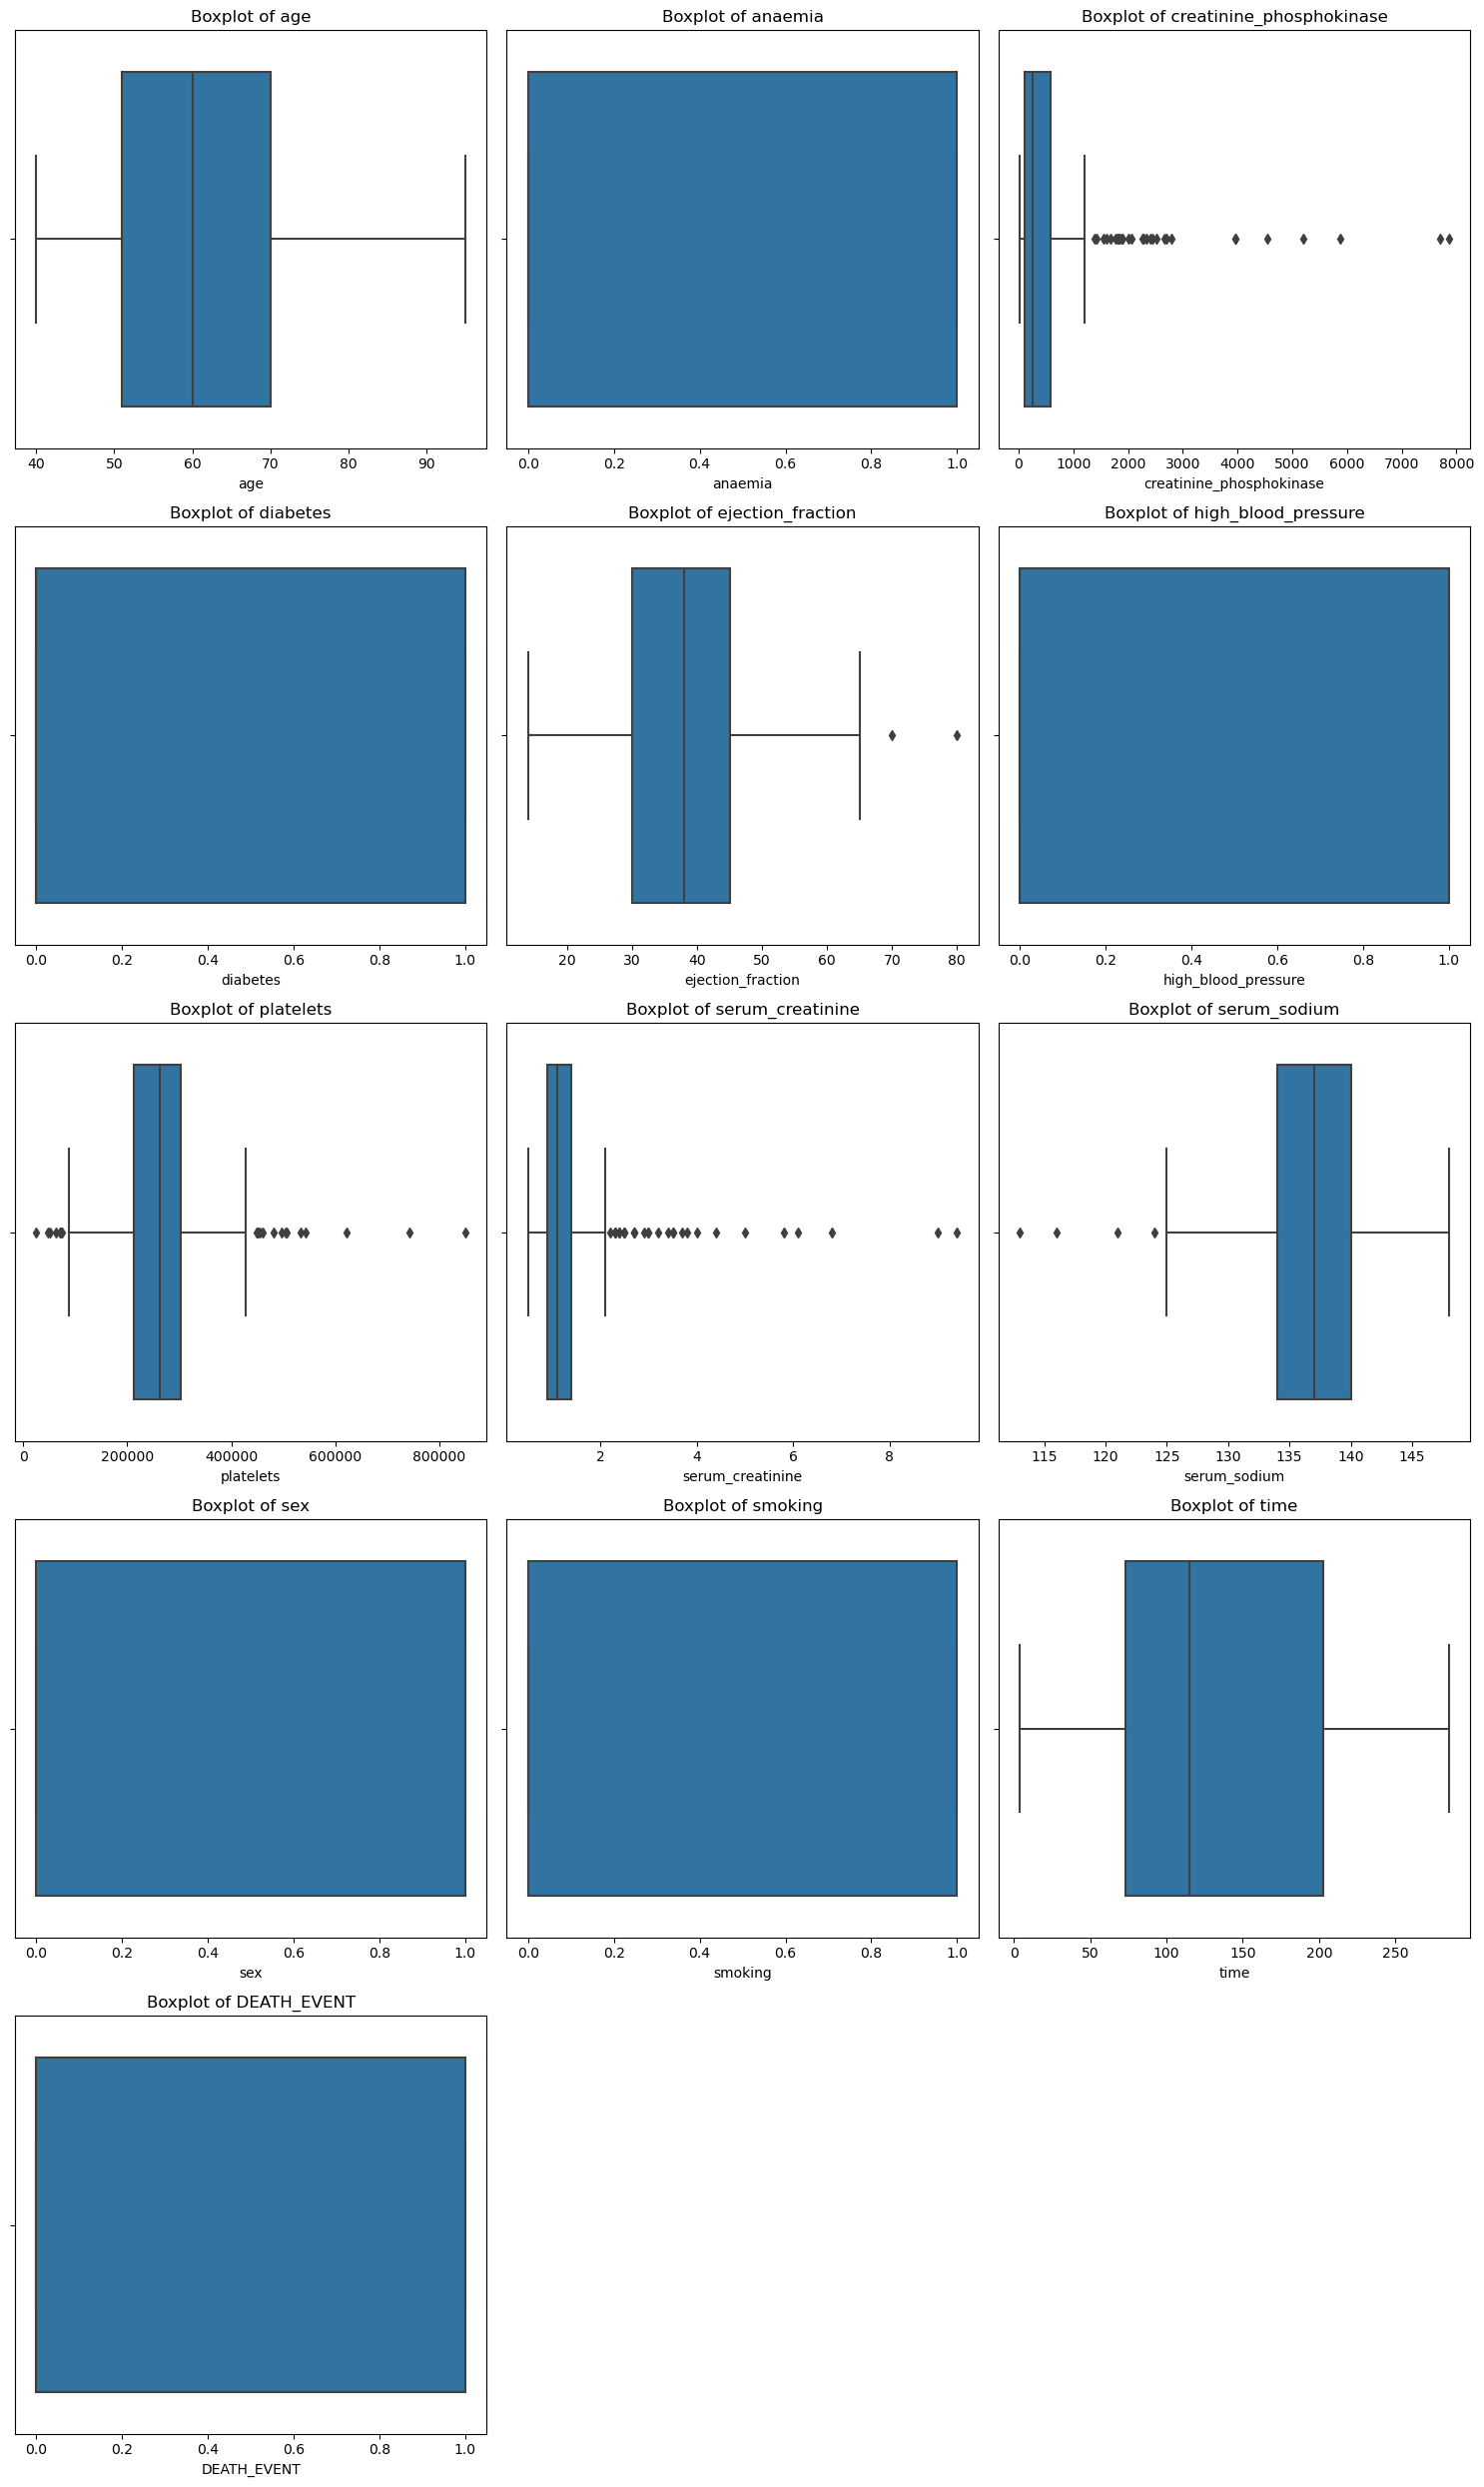

In [15]:

import warnings

# To suppress all warnings:
warnings.filterwarnings('ignore')

#Checking distributions of the various features in the dataset

num_cols = data.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(data.columns, 1):
    if data[col].dtype != 'object':
        plt.subplot(num_rows, 3, i)  # 3 columns per row
        sns.boxplot(x=data[col], orient='vertical')
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

* Serum_creatinine and Creatinine phosphokinase have the greatest outliers

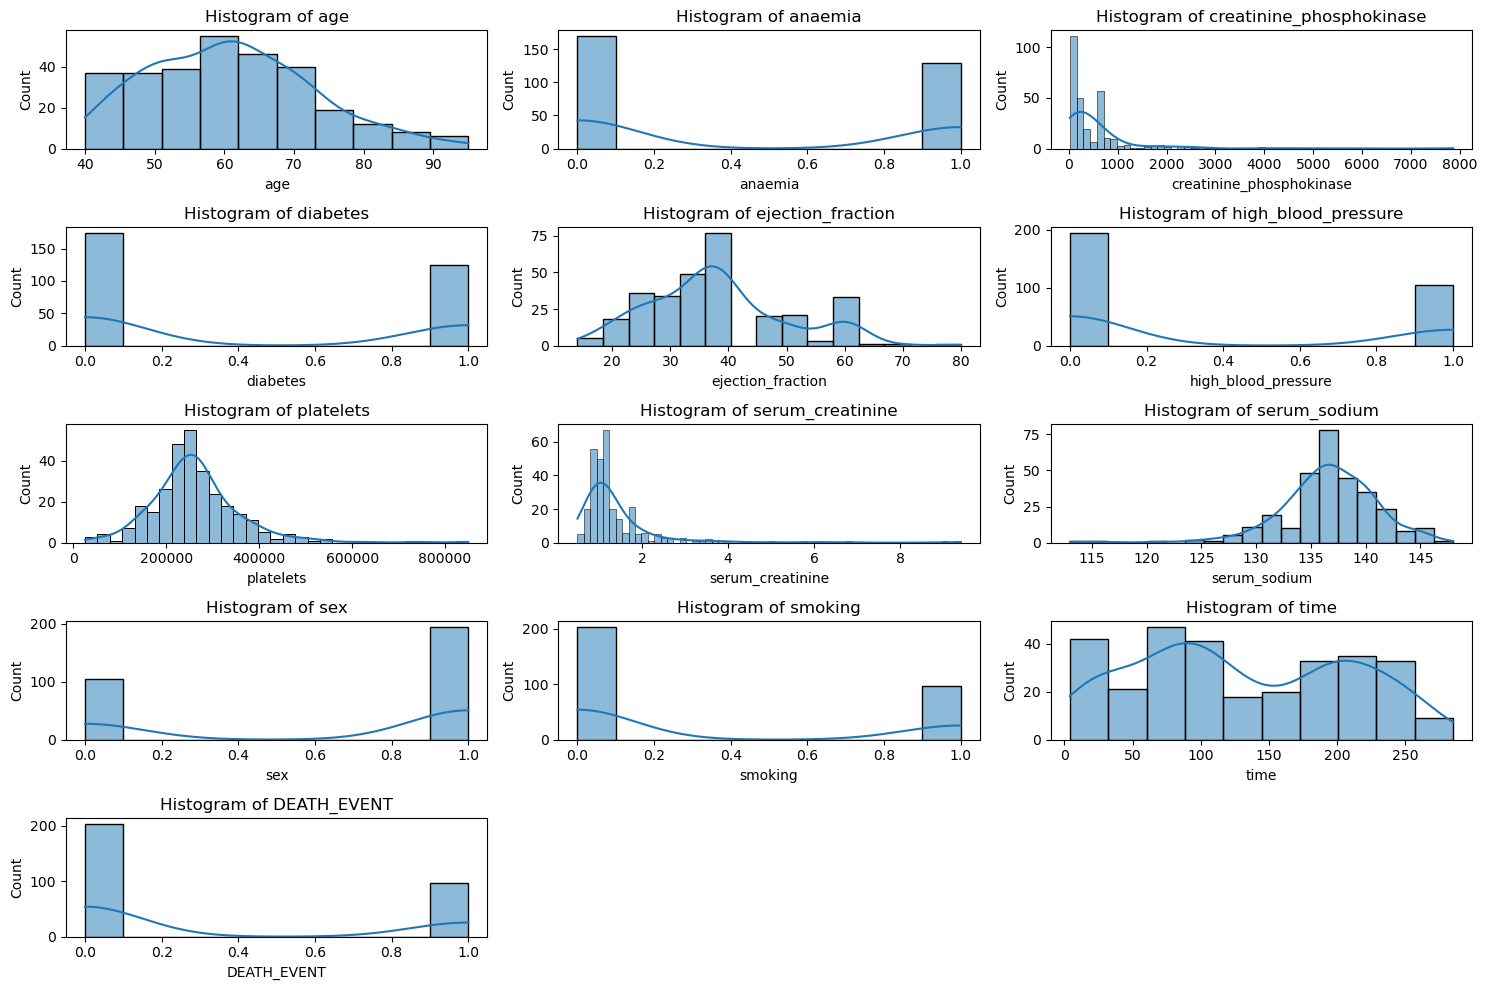

In [17]:
#More visualization on distributions

plt.figure(figsize=(15, 10))

for i, col in enumerate(data.columns, 1):
    if data[col].dtype != 'object':
        plt.subplot(num_rows, 3, i) 
        sns.histplot(data[col], kde=True)  # Create a histogram with a kernel density estimate
        plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

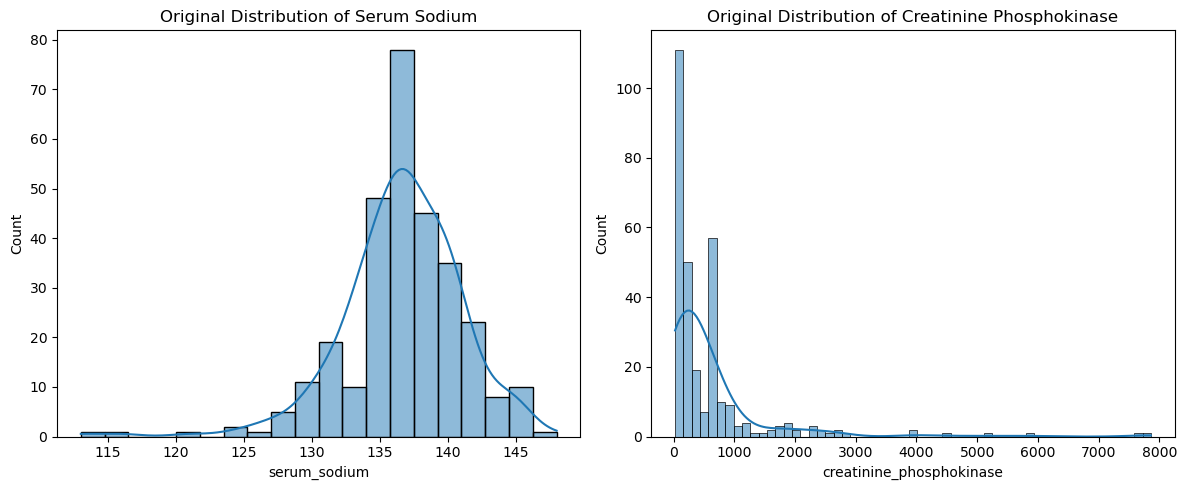

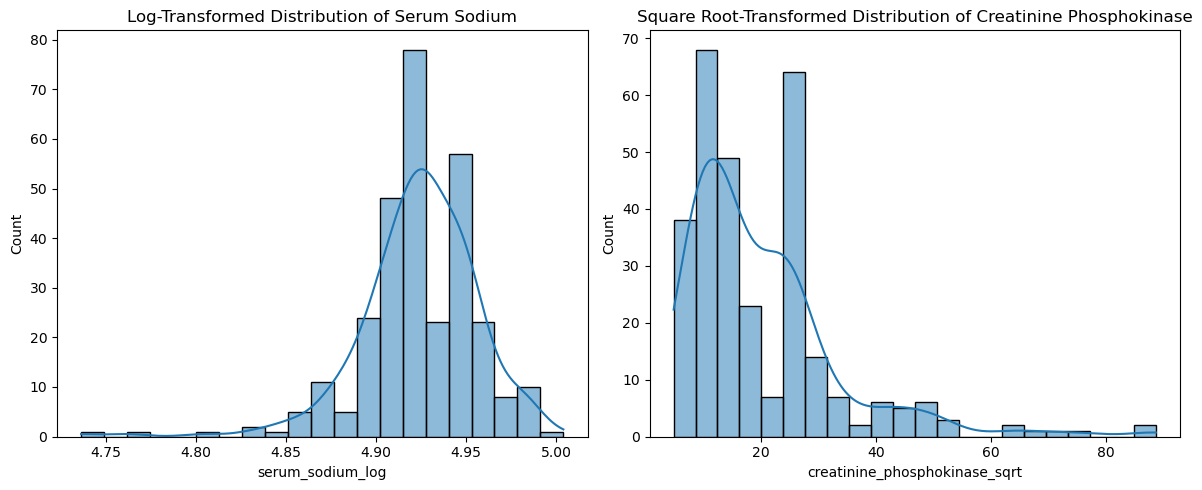

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Visualize the original distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['serum_sodium'], kde=True)
plt.title('Original Distribution of Serum Sodium')

plt.subplot(1, 2, 2)
sns.histplot(data['creatinine_phosphokinase'], kde=True)
plt.title('Original Distribution of Creatinine Phosphokinase')

plt.tight_layout()
plt.show()

# Log transformation for right-skewed 'serum_sodium'
data['serum_sodium_log'] = np.log1p(data['serum_sodium'])

# Square root transformation for left-skewed 'creatinine_phosphokinase'
data['creatinine_phosphokinase_sqrt'] = np.sqrt(data['creatinine_phosphokinase'])

# Visualize the transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['serum_sodium_log'], kde=True)
plt.title('Log-Transformed Distribution of Serum Sodium')

plt.subplot(1, 2, 2)
sns.histplot(data['creatinine_phosphokinase_sqrt'], kde=True)
plt.title('Square Root-Transformed Distribution of Creatinine Phosphokinase')

plt.tight_layout()
plt.show()


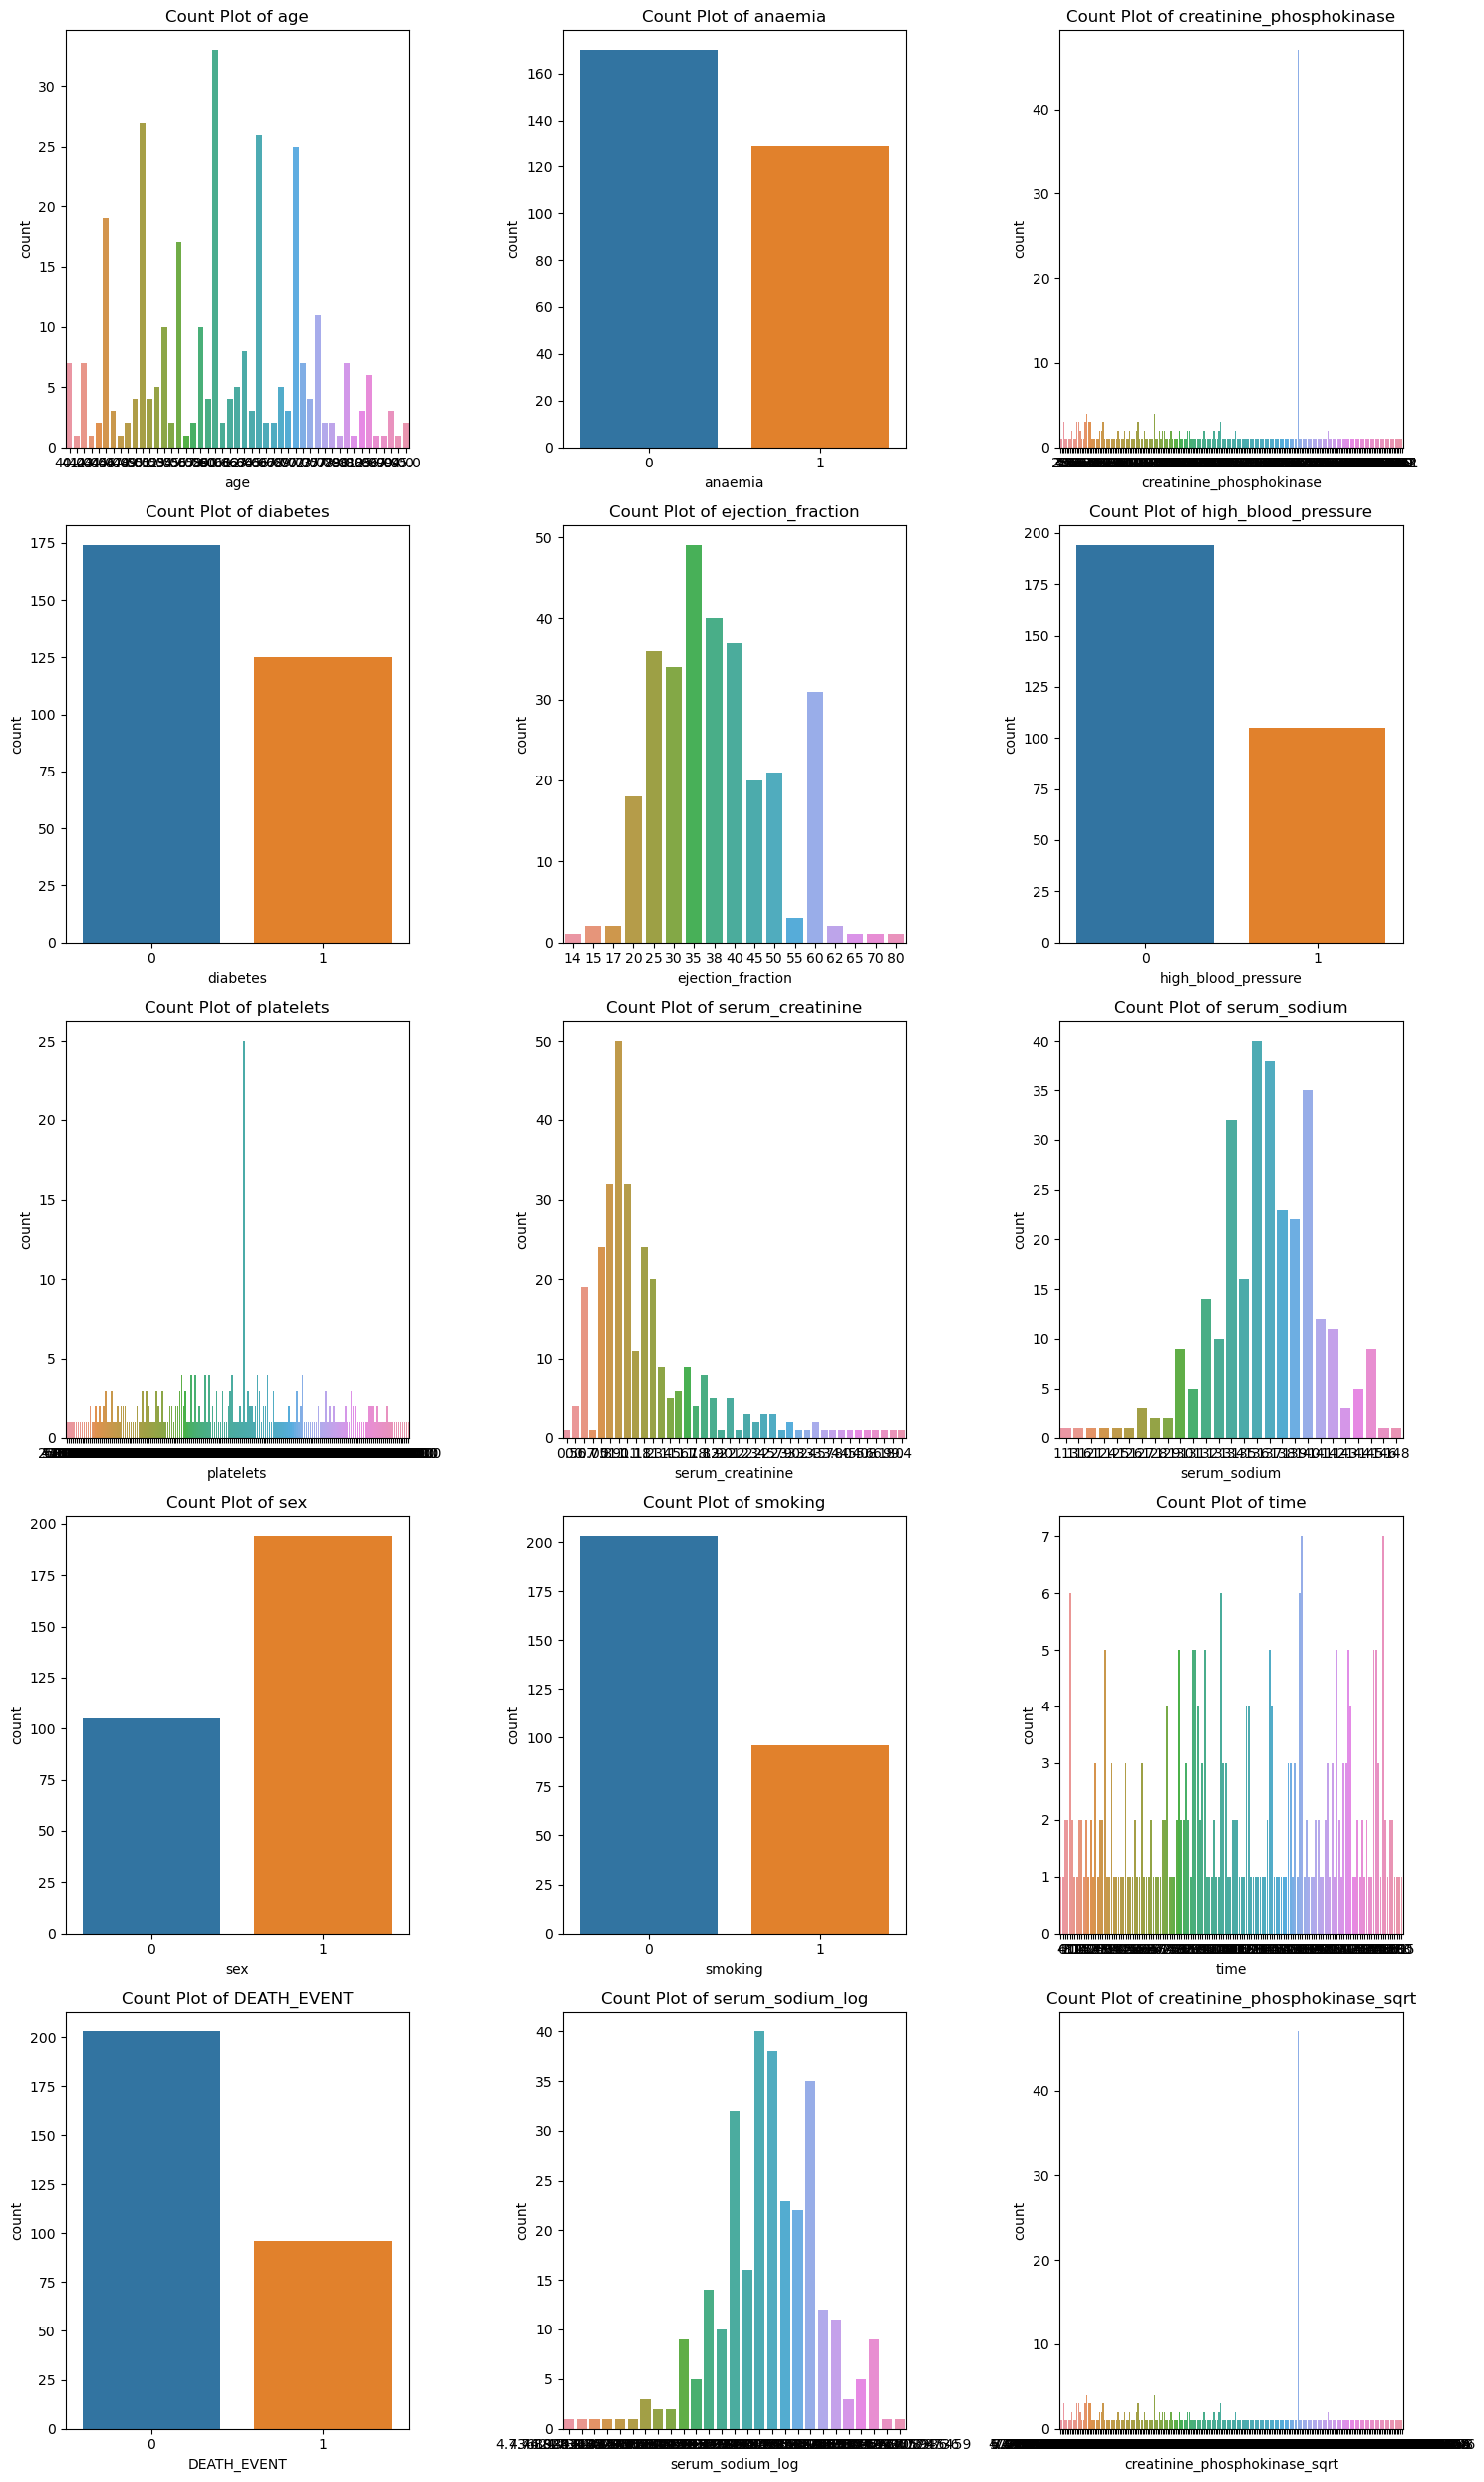

In [19]:
#Distribution of numerical columns using the count function

# Identify and filter categorical columns
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']

# Calculate the number of rows needed based on the number of categorical columns
num_col = len(numerical_cols)
num_row = (num_col + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_row))  # Adjust the figure size based on the number of rows

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_row, 3, i)  # 3 columns per row
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

Count distribution of categorical values can be used to determine the number of variables

In [22]:
y = data['DEATH_EVENT'] #Target variable / Dependent variable

X = data.drop('DEATH_EVENT', axis =1) # Independent 



# Correlation Analysis

In [23]:
correlation = X.corrwith(y)
print(correlation)

age                              0.253729
anaemia                          0.066270
creatinine_phosphokinase         0.062728
diabetes                        -0.001943
ejection_fraction               -0.268603
high_blood_pressure              0.079351
platelets                       -0.049139
serum_creatinine                 0.294278
serum_sodium                    -0.195204
sex                             -0.004316
smoking                         -0.012623
time                            -0.526964
serum_sodium_log                -0.195461
creatinine_phosphokinase_sqrt    0.039732
dtype: float64


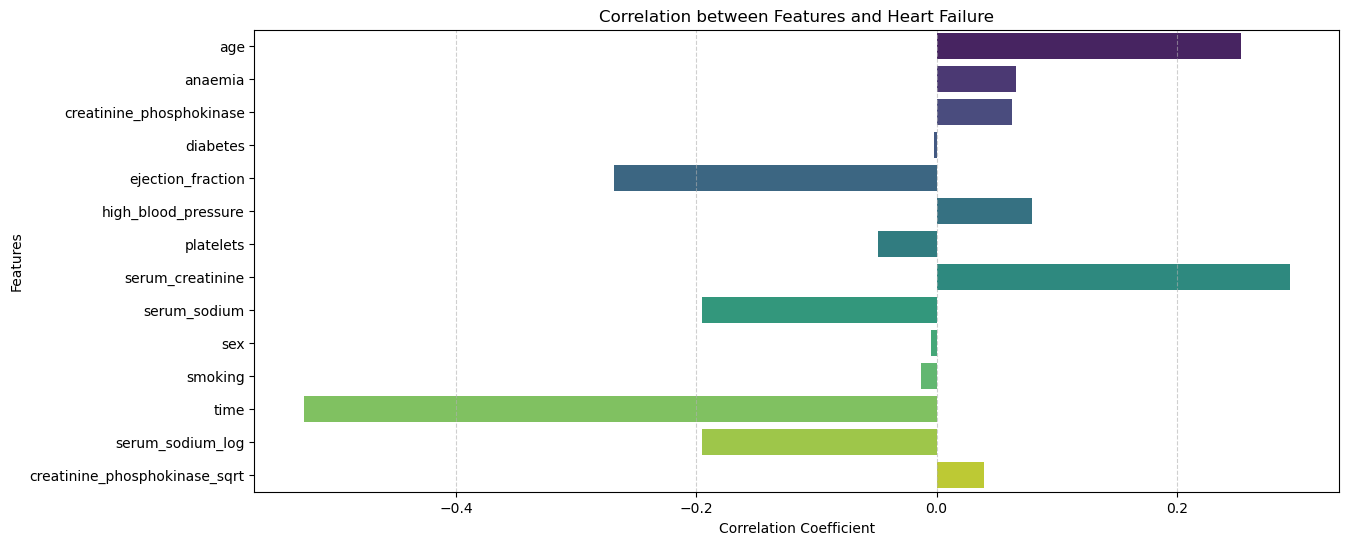

In [27]:
#Plotting graphs on the heart failure

plt.figure(figsize=(14, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette="viridis")
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation between Features and Heart Failure')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

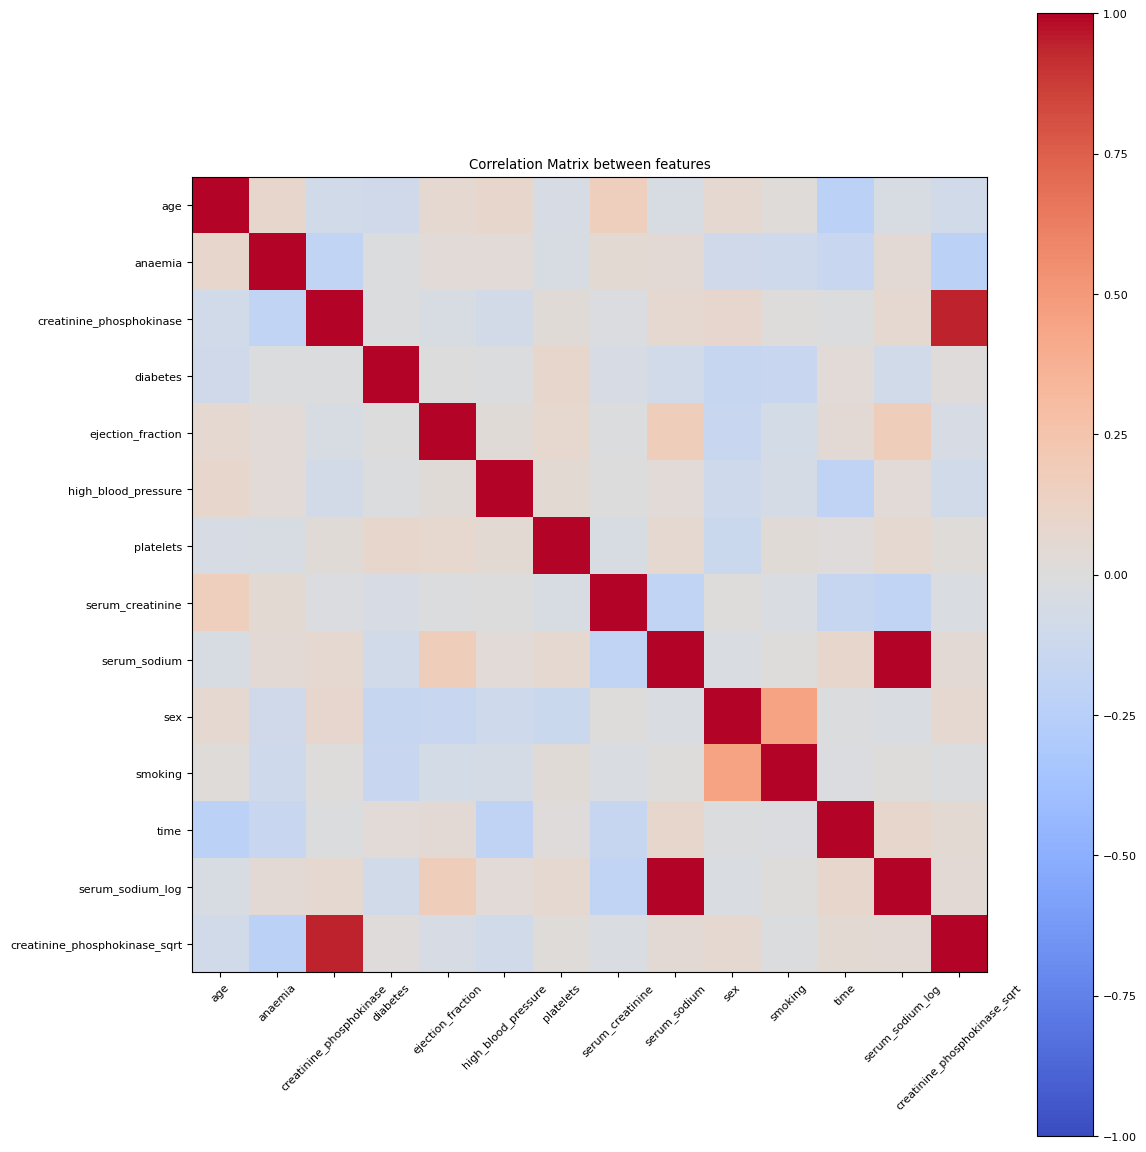

In [28]:
corr_matrix = X.corr()

# Set the font size for labels
plt.rc('font', size=8)

# Create a heatmap plot of the correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix between features')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

* If sex variable increases the variable smoking also increases
* Age and anaemia possess relationship even though their correlation is weak, one factor doesn't affect the other.

* Therefore advisable to drop one variable whereby both are highly correlated for the proper acccuracy of our desired model.

# Variance Inflation Factor

In [29]:
print(corr_matrix)

                                    age   anaemia  creatinine_phosphokinase  \
age                            1.000000  0.088006                 -0.081584   
anaemia                        0.088006  1.000000                 -0.190741   
creatinine_phosphokinase      -0.081584 -0.190741                  1.000000   
diabetes                      -0.101012 -0.012729                 -0.009639   
ejection_fraction              0.060098  0.031557                 -0.044080   
high_blood_pressure            0.093289  0.038182                 -0.070590   
platelets                     -0.052354 -0.043786                  0.024463   
serum_creatinine               0.159187  0.052174                 -0.016408   
serum_sodium                  -0.045966  0.041882                  0.059550   
sex                            0.065430 -0.094769                  0.079791   
smoking                        0.018668 -0.107290                  0.002421   
time                          -0.224068 -0.141414   

In [33]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature          VIF
0                             age    30.136621
1                         anaemia     1.933190
2        creatinine_phosphokinase    11.838789
3                        diabetes     1.830207
4               ejection_fraction    12.178437
5             high_blood_pressure     1.646982
6                       platelets     8.657035
7                serum_creatinine     3.051668
8                    serum_sodium  1679.317918
9                             sex     3.813471
10                        smoking     1.895106
11                           time     4.463190
12               serum_sodium_log  1749.939594
13  creatinine_phosphokinase_sqrt    28.732155


In [37]:
X = X.drop(['serum_sodium'], axis=1)
X.head()

KeyError: "['serum_sodium'] not found in axis"

# Modelling

In [40]:
#splitting into the trained and test data sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
#use of a standard scaler to make sure every feature plays a fair role in prediction 
#standard scaler

sc = StandardScaler()

# Fit the scaler to your data (computes mean and standard deviation)
sc.fit(X)

# Transform the training and test data to standardize them
X_train_standardized = sc.transform(X)
X_test_standardized = sc.transform(X_test)

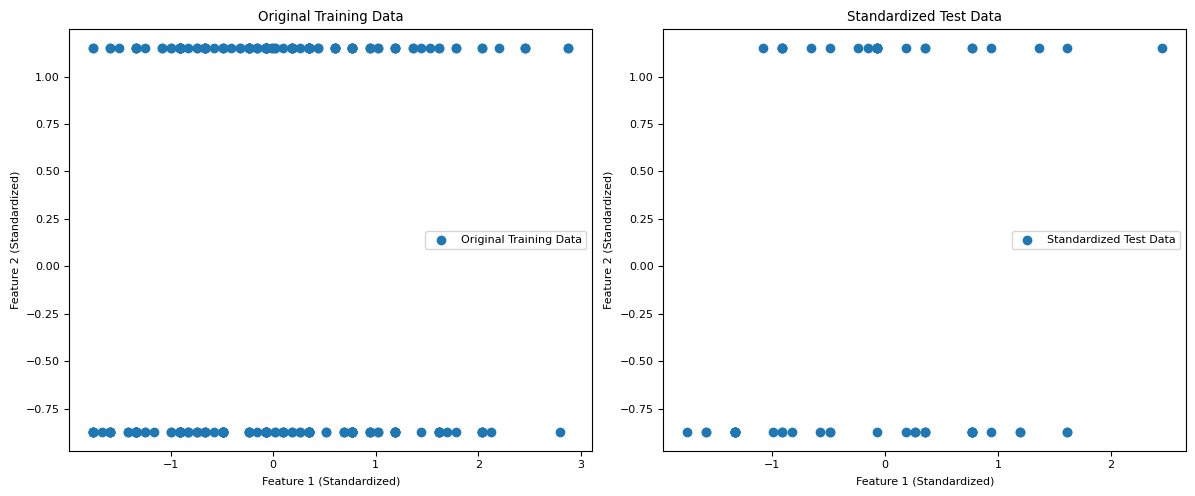

In [42]:
# Separate the features for plotting
feature1_train = X_train_standardized[:, 0]
feature2_train = X_train_standardized[:, 1]

feature1_test = X_test_standardized[:, 0]
feature2_test = X_test_standardized[:, 1]

# Plot the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(feature1_train, feature2_train, marker='o', label='Original Training Data')
plt.title('Original Training Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()

# Plot the standardized data
plt.subplot(1, 2, 2)
plt.scatter(feature1_test, feature2_test, marker='o', label='Standardized Test Data')
plt.title('Standardized Test Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()

plt.tight_layout()
plt.show()

Training Logistic Regression...
Accuracy for Logistic Regression: 0.82
Confusion Matrix for Logistic Regression:
[[34  1]
 [10 15]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60

AUC-ROC for Logistic Regression: 0.85


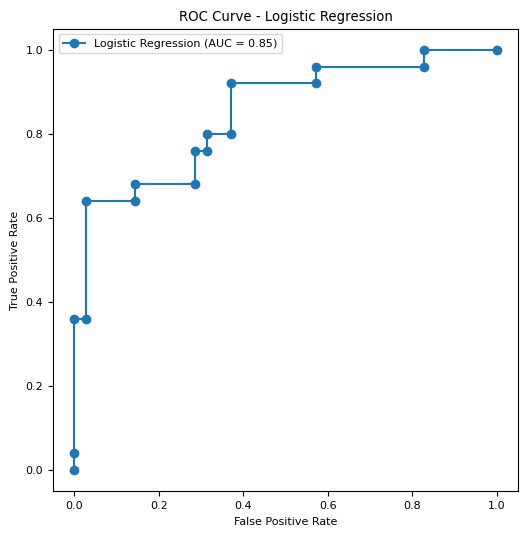



Training Decision Tree...
Accuracy for Decision Tree: 1.00
Confusion Matrix for Decision Tree:
[[35  0]
 [ 0 25]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

AUC-ROC for Decision Tree: 1.00


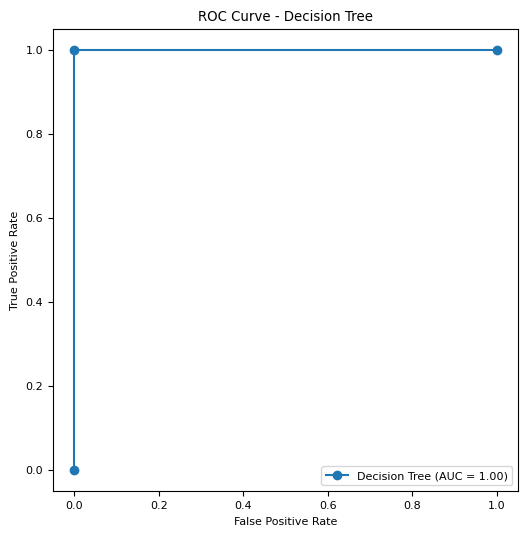



Training Random Forest...
Accuracy for Random Forest: 1.00
Confusion Matrix for Random Forest:
[[35  0]
 [ 0 25]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

AUC-ROC for Random Forest: 1.00


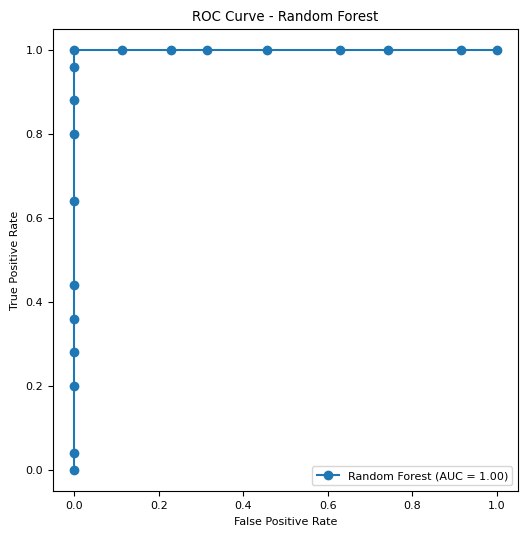



Training MLP Classifier...
Accuracy for MLP Classifier: 0.88
Confusion Matrix for MLP Classifier:
[[34  1]
 [ 6 19]]
Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        35
           1       0.95      0.76      0.84        25

    accuracy                           0.88        60
   macro avg       0.90      0.87      0.88        60
weighted avg       0.89      0.88      0.88        60

MLP Classifier does not support predict_proba, so AUC-ROC cannot be calculated.


Training XGBoost...
Accuracy for XGBoost: 1.00
Confusion Matrix for XGBoost:
[[35  0]
 [ 0 25]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00    

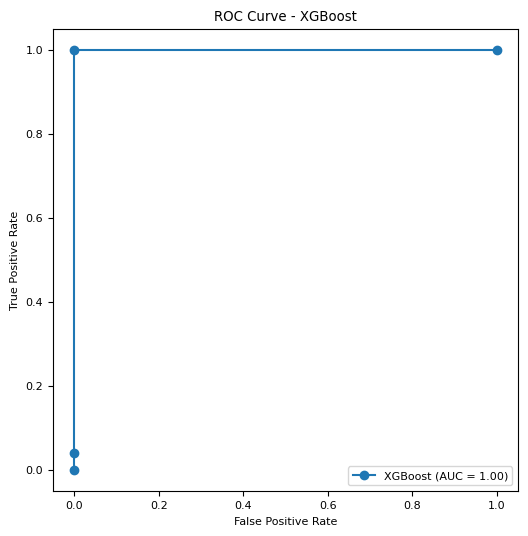

In [43]:
models = {
    'Logistic Regression': LogisticRegressionCV(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP Classifier': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# Iterate through models and evaluate each one
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_standardized, y)
    
    # Predictions
    y_pred = model.predict(X_test_standardized)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{confusion}")
    
    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{classification_rep}")
    
    # ROC Curve and AUC
    if name != 'MLP Classifier':  # MLP Classifier doesn't have predict_proba
        y_prob = model.predict_proba(X_test_standardized)[:, 1]  # Probability of class 1
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC for {name}: {roc_auc:.2f}")
    
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, marker='o', label=f"{name} (AUC = {roc_auc:.2f})")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
    else:
        print("MLP Classifier does not support predict_proba, so AUC-ROC cannot be calculated.")
    
    print("\n")